              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



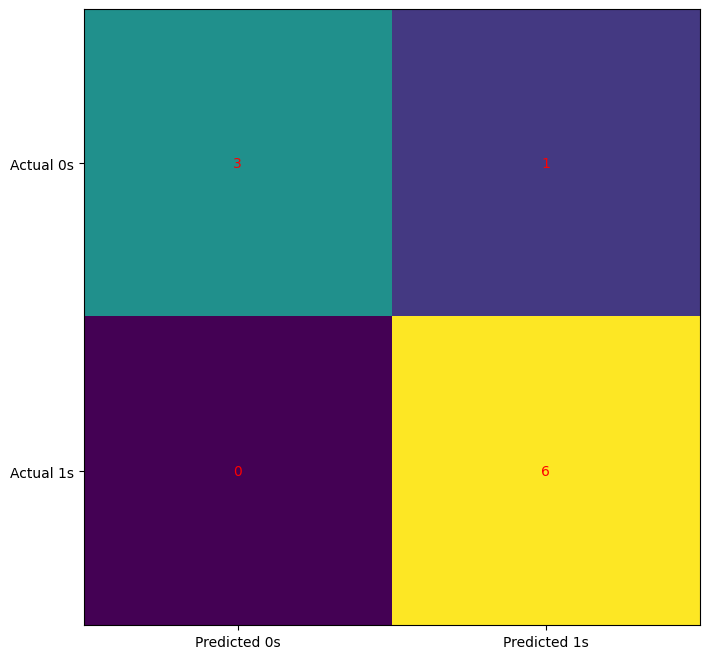

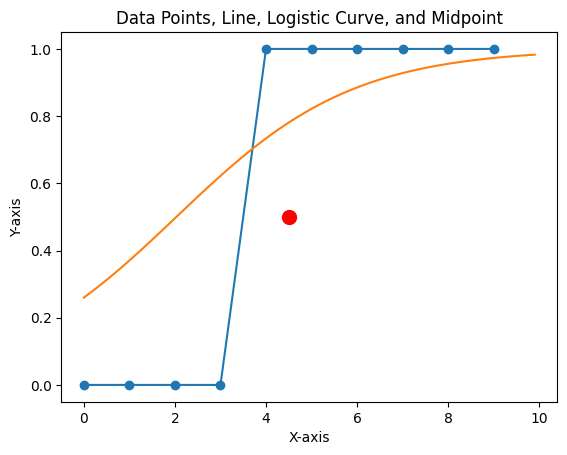

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()

def plot_data_and_curve(x, y, x_new, y_new):
    midpoint_x = (np.max(x) + np.min(x)) / 2
    midpoint_y = (np.max(y) + np.min(y)) / 2

    plt.scatter(x, y)
    plt.plot(x, y)
    plt.plot(x_new, y_new)
    plt.plot(midpoint_x, midpoint_y, marker='o', color='red', markersize=10)

    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Data Points, Line, Logistic Curve, and Midpoint')
    plt.show()

x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)

y_pred = model.predict(x)
print(classification_report(y, y_pred))
plot_confusion_matrix(y, y_pred)

print('')

x_new = np.arange(0, 10, 0.1)[:, np.newaxis]
y_new = model.predict_proba(x_new)[:, 1]
plot_data_and_curve(x, y, x_new, y_new)
